In [1]:
import tensorflow as tf
tf.__version__

'2.2.0'

In [2]:
from tensorflow.keras.layers import Input, Dense, Lambda, Flatten, Conv2D
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [3]:
# resize all images
IMAGE_SIZE = [224, 224]

train_path = 'Dataset/Train'
test_path = 'Dataset/test'

In [4]:
# import the vgg19 library as shown below and add preprocessing layer to the front of vgg19
# Here we will be using imagenet weights
vgg19 = VGG19(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

In [6]:
# don't train existing weights
for layer in vgg19.layers:
    layer.trainable = False

In [7]:
# useful for getting number of output classes
folders = glob("Dataset/Train/*")

In [8]:
folders

['Dataset/Train/Parasite', 'Dataset/Train/Uninfected']

In [9]:
# our layers you can add more if you want
x = Flatten()(vgg19.output)

In [10]:
prediction = Dense(len(folders), activation = 'softmax')(x)

# Create a model object
model = Model(inputs = vgg19.input, outputs = prediction)

In [11]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [12]:
from tensorflow.keras.layers import MaxPooling2D

In [15]:
# Create model from scratch using CNN
model = Sequential()
model.add(Conv2D(filters = 16, kernel_size = 2, padding = 'same', activation = 'relu', input_shape = (224, 224, 3)))
model.add(MaxPooling2D(pool_size = 2))
model.add(Conv2D(filters = 32, kernel_size = 2, padding = 'same', activation = 'relu'))
model.add(MaxPooling2D(pool_size = 2))
model.add(Conv2D(filters = 64, kernel_size = 2, padding = 'same', activation = 'relu'))
model.add(MaxPooling2D(pool_size = 2))
model.add(Flatten())
model.add(Dense(500, activation = 'relu'))
model.add(Dense(2, activation = 'softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 224, 224, 16)      208       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 112, 112, 16)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 112, 112, 32)      2080      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 56, 56, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 56, 56, 64)        8256      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 28, 28, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 50176)            

In [16]:
# tell the model what cost and optimization method to use
model.compile(loss = 'categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [17]:
# use the image data generator to import the images from the datase
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255,
                                  shear_range=0.2,
                                  zoom_range=0.2,
                                  horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)

In [18]:
# Make sure you provide the same target size as initialized for the image size
training_set = train_datagen.flow_from_directory('Dataset/Train',
                                                target_size = (224, 224),
                                                batch_size = 32,
                                                class_mode = 'categorical')

Found 416 images belonging to 2 classes.


In [19]:
training_set

In [20]:
test_set = test_datagen.flow_from_directory('Dataset/Test',
                                           target_size=(224, 224),
                                           batch_size=32,
                                           class_mode='categorical')

Found 134 images belonging to 2 classes.


In [22]:
# fit the model
# Run the cell. It will take some time to execute
r = model.fit_generator(training_set,
                       validation_data = test_set,
                       epochs = 10,
                       steps_per_epoch = len(training_set),
                       validation_steps = len(test_set))

Epoch 1/10
13/13 [==============================] - 20s 2s/step - loss: 0.4500 - accuracy: 0.7740 - val_loss: 0.9888 - val_accuracy: 0.3806
Epoch 2/10
13/13 [==============================] - 19s 1s/step - loss: 0.4451 - accuracy: 0.7692 - val_loss: 0.7819 - val_accuracy: 0.4627
Epoch 3/10
13/13 [==============================] - 20s 2s/step - loss: 0.3850 - accuracy: 0.8269 - val_loss: 0.7204 - val_accuracy: 0.5000
Epoch 4/10
13/13 [==============================] - 20s 2s/step - loss: 0.3320 - accuracy: 0.8654 - val_loss: 0.6283 - val_accuracy: 0.6567
Epoch 5/10
13/13 [==============================] - 20s 2s/step - loss: 0.3765 - accuracy: 0.8510 - val_loss: 0.5776 - val_accuracy: 0.6567
Epoch 6/10
13/13 [==============================] - 20s 2s/step - loss: 0.3524 - accuracy: 0.8726 - val_loss: 0.4986 - val_accuracy: 0.6866
Epoch 7/10
13/13 [==============================] - 21s 2s/step - loss: 0.3064 - accuracy: 0.8606 - val_loss: 0.4625 - val_accuracy: 0.7910
Epoch 8/10
13/13 [==

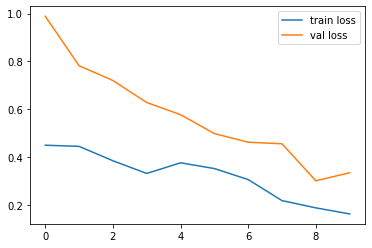

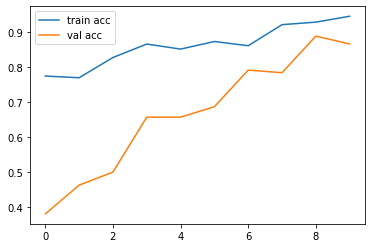

<Figure size 432x288 with 0 Axes>

In [23]:
# plot the loss
plt.plot(r.history['loss'], label = 'train loss')
plt.plot(r.history['val_loss'], label = 'val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label = 'train acc')
plt.plot(r.history['val_accuracy'], label = 'val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [25]:
# save it as h5 file
from tensorflow.keras.models import load_model
model.save('model_vgg19.h5')

In [26]:
y_pred = model.predict(test_set)

In [27]:
y_pred

array([[1.68377534e-01, 8.31622422e-01],
       [9.99494076e-01, 5.05953794e-04],
       [9.19760346e-01, 8.02396238e-02],
       [9.99831080e-01, 1.68865474e-04],
       [9.95946944e-01, 4.05309629e-03],
       [2.67940998e-01, 7.32058942e-01],
       [9.99273241e-01, 7.26825849e-04],
       [1.91573963e-01, 8.08426082e-01],
       [3.23576421e-01, 6.76423550e-01],
       [1.73689574e-01, 8.26310456e-01],
       [1.10066280e-01, 8.89933765e-01],
       [8.87326181e-01, 1.12673834e-01],
       [9.98866200e-01, 1.13380281e-03],
       [4.86097872e-01, 5.13902187e-01],
       [1.00000000e+00, 3.66201791e-10],
       [1.47453070e-01, 8.52546930e-01],
       [8.86885285e-01, 1.13114707e-01],
       [9.51092601e-01, 4.89074178e-02],
       [2.64550030e-01, 7.35449910e-01],
       [1.43647984e-01, 8.56352031e-01],
       [8.42064500e-01, 1.57935441e-01],
       [1.82438463e-01, 8.17561507e-01],
       [6.87306583e-01, 3.12693357e-01],
       [9.99971032e-01, 2.90053049e-05],
       [9.659351

In [28]:
import numpy as np
y_pred = np.argmax(y_pred, axis = 1)

In [29]:
y_pred

array([1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1,
       0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1])

In [30]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [31]:
model = load_model('model_vgg19.h5')

In [32]:
img = image.load_img('Dataset/Test/Uninfected/2.png', target_size=(224,224))


In [33]:
x = image.img_to_array(img)

In [34]:
x

array([[[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       ...,

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]]], dtype=float32)

In [35]:
x.shape


(224, 224, 3)

In [36]:
x = x/225

In [37]:
x = np.expand_dims(x, axis = 0)
img_data = preprocess_input(x)
img_data.shape

(1, 224, 224, 3)

In [38]:
model.predict(img_data)

array([[1.0000000e+00, 2.7997578e-16]], dtype=float32)

In [39]:
a = np.argmax(model.predict(img_data), axis=1)

In [40]:
if(a==1):
    print('Unifected')
else:
    print('Infected')

Infected
